In [1]:
!pip install bayesian-optimization

In [2]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 7.2 MB/s eta 0:00:00


In [3]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Importar el clasificador SVM
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [5]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [6]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [7]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [8]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [9]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [10]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [11]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [12]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [13]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [14]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [15]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [16]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 3 1]


In [17]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [18]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [19]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2


In [20]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
6505,2,2,1,2,1,2,1,1,2,2
3634,3,0,1,2,1,1,1,1,2,2
8384,1,0,2,1,2,2,2,2,1,3
10580,4,1,4,4,2,2,2,2,3,5
7349,1,0,2,1,1,2,2,2,1,1
11331,4,2,5,4,2,2,2,2,3,6
8939,2,1,3,1,2,2,2,2,2,4
11270,4,2,5,4,2,2,2,2,3,6
8552,2,0,3,1,2,2,2,2,1,3
10312,4,1,4,3,2,2,2,2,3,5


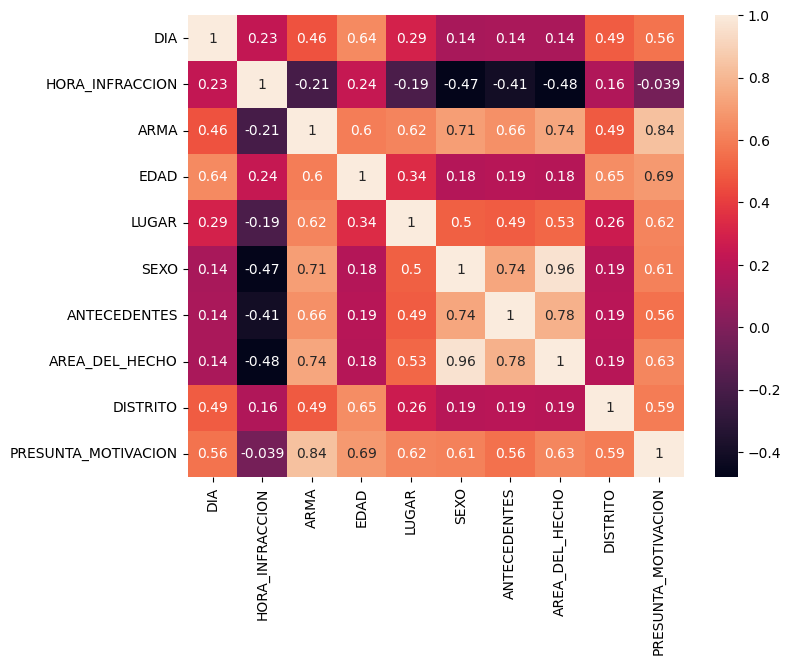

In [21]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [22]:

X = df.iloc[:, [6,0,1,3,8,5,9,7,2]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[4]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,ANTECEDENTES,DIA,HORA_INFRACCION,EDAD,DISTRITO,SEXO,PRESUNTA_MOTIVACION,AREA_DEL_HECHO,ARMA
0,1,3,0,1,2,1,1,1,1
1,1,3,2,2,1,1,2,1,2
2,1,2,0,2,1,1,2,1,2
3,1,4,2,3,3,1,1,1,1
4,1,3,3,2,1,1,2,1,1


In [23]:

#presentacion de los atributos de destino
Y.head()

,LUGAR
0,1
1,1
2,2
3,1
4,1


In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [25]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ANTECEDENTES         9414 non-null   int64
 1   DIA                  9414 non-null   int64
 2   HORA_INFRACCION      9414 non-null   int64
 3   EDAD                 9414 non-null   int64
 4   DISTRITO             9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   PRESUNTA_MOTIVACION  9414 non-null   int64
 7   AREA_DEL_HECHO       9414 non-null   int64
 8   ARMA                 9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [26]:
import optuna
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# Función para evaluar el modelo SVM con diferentes kernels, parámetros C y decision_function_shape
def svm_evaluate(trial):
    # Sugerir un valor para el parámetro C entre 1 y 100
    C = trial.suggest_float('C', 1, 100)

    # Sugerir el tipo de kernel como un valor categórico
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    # Sugerir la estrategia 'ovo' (uno contra uno) o 'ovr' (uno contra todos)
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovo', 'ovr'])

    # Crear el clasificador SVM con los parámetros sugeridos
    svc = SVC(C=C, kernel=kernel, decision_function_shape=decision_function_shape, random_state=7)

    # Ajustar el modelo con los datos de entrenamiento
    svc.fit(X_train, y_train.values.ravel())

    # Realizar predicciones en el conjunto de prueba
    y_pred = svc.predict(X_test)

    # Retornar el precision_score como métrica a optimizar
    return precision_score(y_test, y_pred, average='micro')

# Definir el estudio de Optuna para maximizar la precisión
study = optuna.create_study(direction='maximize')

# Ejecutar la optimización (n_trials = número de intentos)
study.optimize(svm_evaluate, n_trials=25)

# Obtener los mejores parámetros encontrados
best_params = study.best_params
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener la mejor precisión alcanzada
best_precision = study.best_value
print(f"La mejor precisión alcanzada es: {best_precision * 100:.2f}%")


[I 2024-12-04 01:06:45,161] A new study created in memory with name: no-name-d4828e69-7fcb-4043-a834-87f567a1c388
[I 2024-12-04 01:06:54,480] Trial 0 finished with value: 0.8704333050127443 and parameters: {'C': 17.97163686376136, 'kernel': 'rbf', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.8704333050127443.
[I 2024-12-04 01:07:01,049] Trial 1 finished with value: 0.3062871707731521 and parameters: {'C': 19.22755667051583, 'kernel': 'sigmoid', 'decision_function_shape': 'ovr'}. Best is trial 0 with value: 0.8704333050127443.
[I 2024-12-04 01:07:06,903] Trial 2 finished with value: 0.3062871707731521 and parameters: {'C': 32.425193663341695, 'kernel': 'sigmoid', 'decision_function_shape': 'ovr'}. Best is trial 0 with value: 0.8704333050127443.
[I 2024-12-04 01:07:25,867] Trial 3 finished with value: 0.8717077315208156 and parameters: {'C': 44.784192399359135, 'kernel': 'rbf', 'decision_function_shape': 'ovr'}. Best is trial 3 with value: 0.8717077315208156.
[I 2024-

Mejores hiperparámetros encontrados: {'C': 44.784192399359135, 'kernel': 'rbf', 'decision_function_shape': 'ovr'}
La mejor precisión alcanzada es: 87.17%


In [26]:
# Cargamos la librería Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Llamamos al constructor de Support Vector Machine
classifier = SVC(kernel='rbf', C=44.78, decision_function_shape='ovr')

# Entrenamos el modelo
svm_modelo = classifier.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_LUGAR.xlsx")

              precision    recall  f1-score      support
1              0.816384  0.964942  0.884468  1198.000000
2              0.955224  0.775087  0.855778  1156.000000
accuracy       0.871708  0.871708  0.871708     0.871708
macro avg      0.885804  0.870014  0.870123  2354.000000
weighted avg   0.884565  0.871708  0.870379  2354.000000


In [28]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             1   0.816384
1             2   0.955224
2     macro avg   0.885804
3  weighted avg   0.884565


In [29]:

y_test.head()

,LUGAR
2456,1
8817,2
5046,1
2821,1
247,1


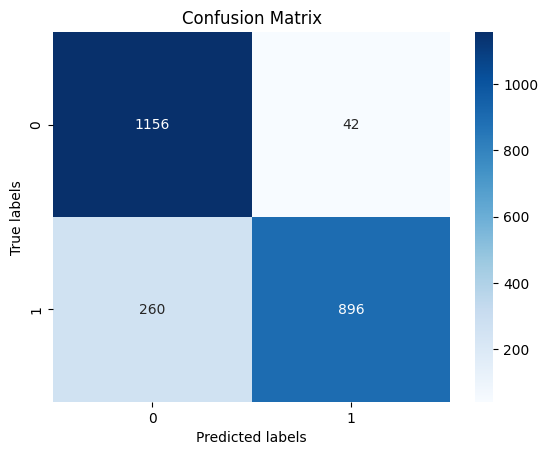

In [30]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [31]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_LUGAR.xlsx")

      0    1
0  1156   42
1   260  896


In [32]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['lugar_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)

,lugar_prediccion,LUGAR
0,2,1
1,2,2
2,1,1
3,1,1
4,2,1
5,2,2
6,2,2
7,1,1
8,2,2
9,1,1


In [33]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada_svm(svm_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)





In [34]:
v_cruzada_svm(svm_modelo, X_train, y_train)

Iteraciones validación cruzada (Precisión):
 [0.87997876 0.88635157 0.86032926 0.8629846  0.86344315]
Precisión media:
 0.870617 (0.010495)
Iteraciones validación cruzada (Accuracy):
 [0.87997876 0.88635157 0.86032926 0.8629846  0.86344315]
Accuracy media:
 0.870617 (0.010495)
Iteraciones validación cruzada (Recall):
 [0.87997876 0.88635157 0.86032926 0.8629846  0.86344315]
Recall media:
 0.870617 (0.010495)


In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  87.17077315208157
Accuracy:  87.17077315208157
Recall:  87.17077315208157


In [36]:
df_combined['LUGAR'] = df_combined['LUGAR'].apply(lambda x:
                                                                                                    'Vía pública' if x == 1 else
                                                                                                    'Lugares privados')


In [37]:
df_combined['lugar_prediccion'] = df_combined['lugar_prediccion'].apply(lambda x:
                                                                                                     'Vía pública' if x == 1 else
                                                                                                    'Lugares privados')




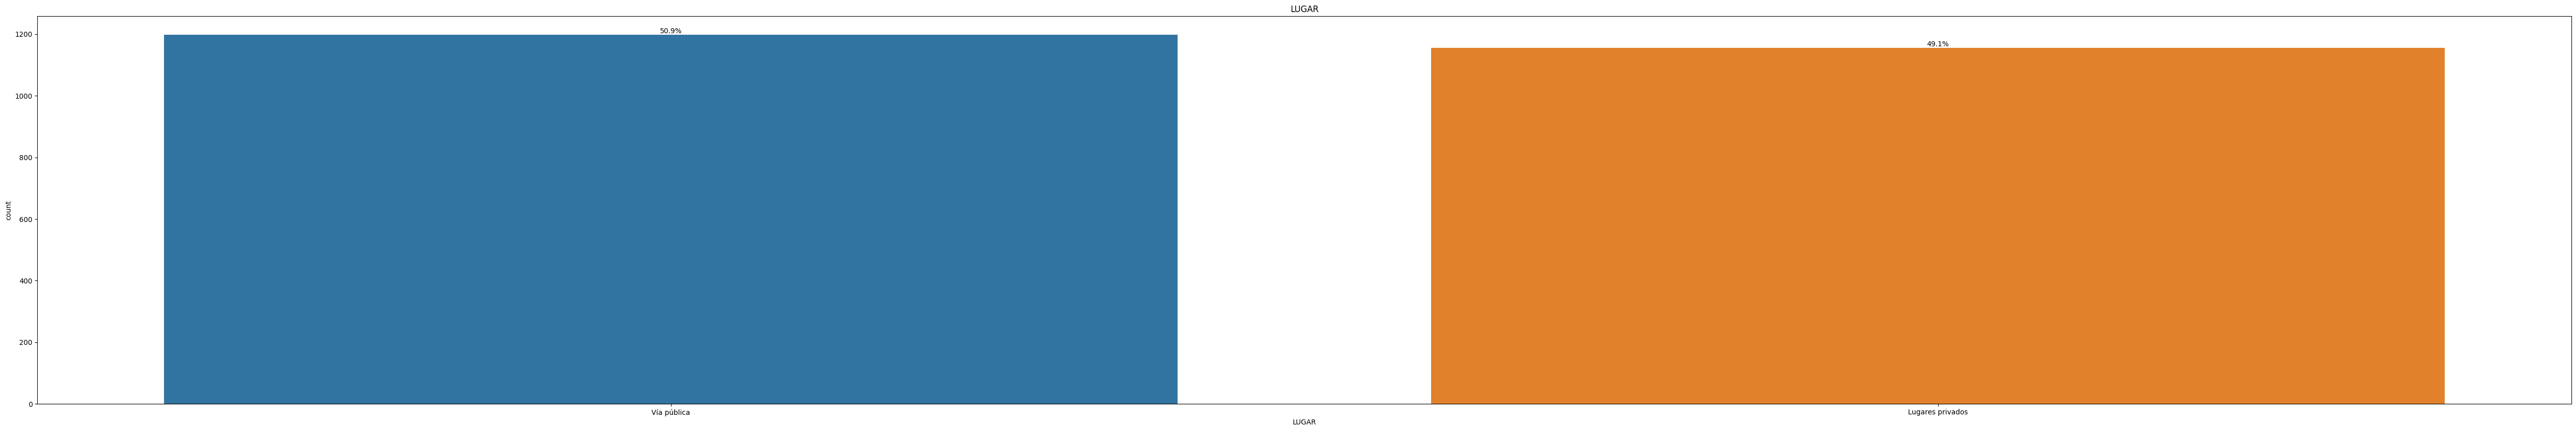

In [38]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (65,10))
ncount=len(df_combined)
sns.countplot(x='LUGAR',hue = 'LUGAR', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('LUGAR')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_LUGAR.png")

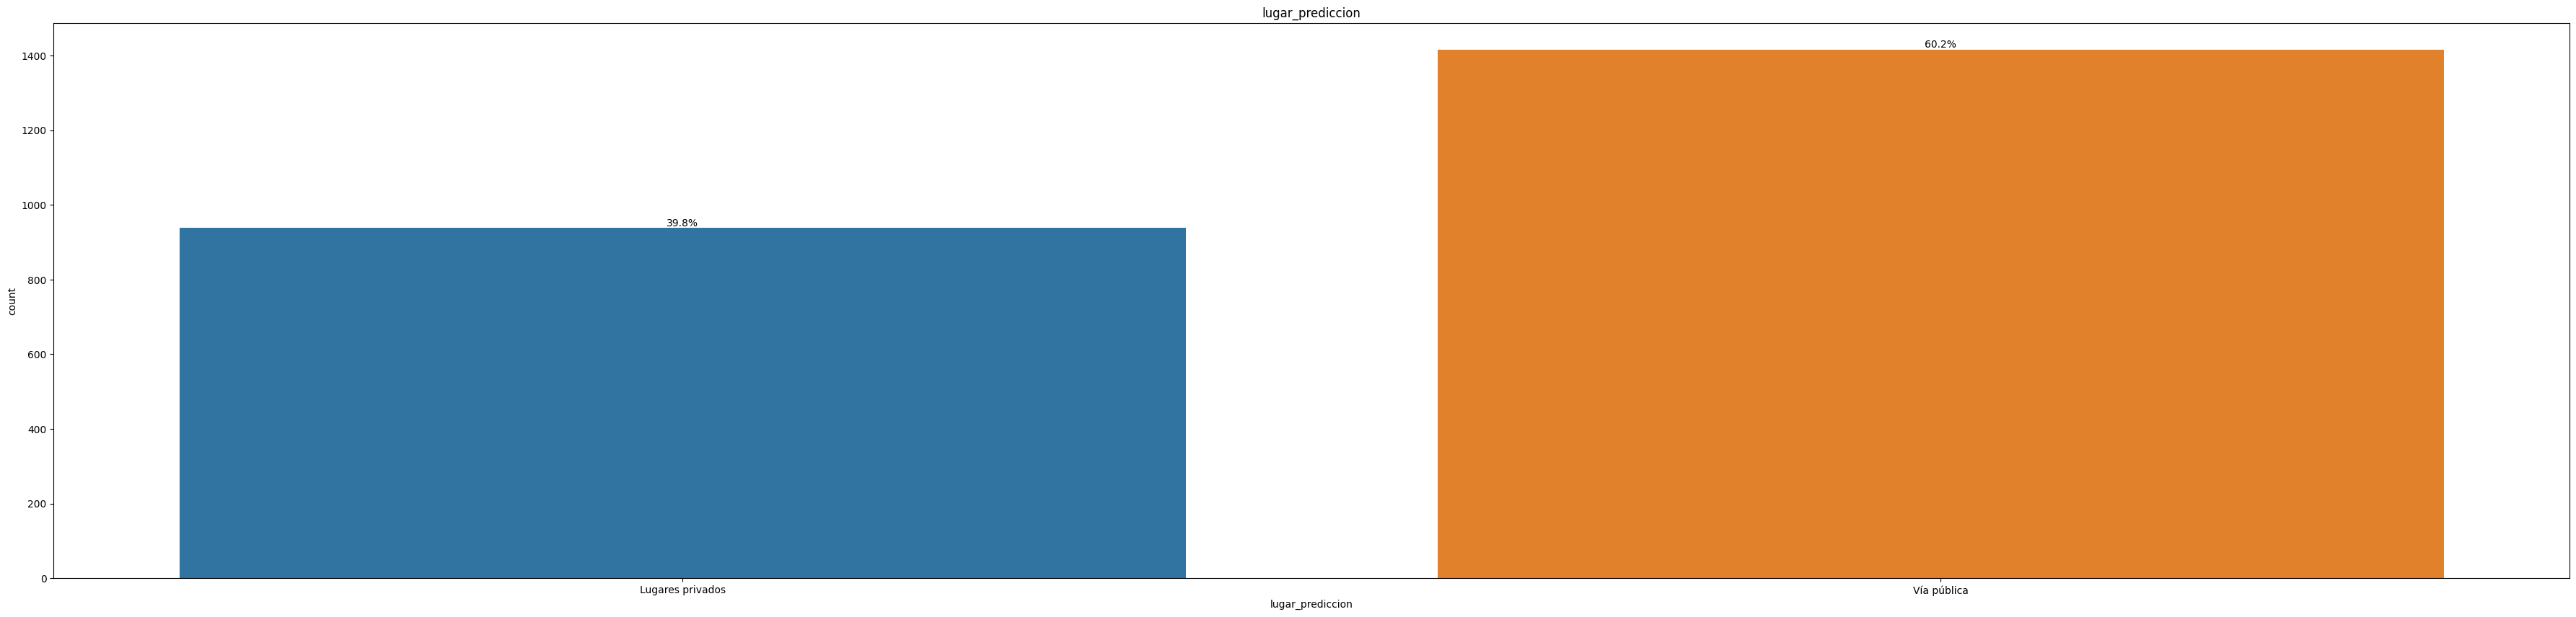

In [39]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='lugar_prediccion',hue = 'lugar_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('lugar_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_LUGAR.png")

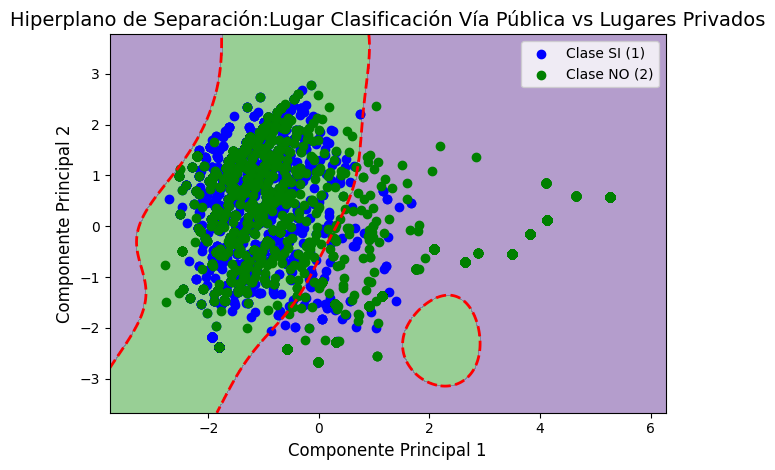

In [40]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
# Entrenar el modelo con los datos reducidos por PCA

classifier_pca = SVC(kernel='rbf', C=44.78, decision_function_shape='ovr')
classifier_pca.fit(X_train_2D, y_train.values.ravel())  # Entrenar el modelo con las 2 dimensiones

# Crear la malla de puntos para graficar
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Obtener el puntaje de decisión sobre la malla
Z = classifier_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar el área de decisión y el hiperplano
plt.contourf(xx, yy, Z > 0, alpha=0.5, cmap=plt.cm.Paired)  # Regiones de decisión
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', linestyles='--')  # Hiperplano

# Graficar los puntos de las clases
plt.scatter(X_train_2D[y_train.values.ravel() == 1, 0], X_train_2D[y_train.values.ravel() == 1, 1], color='blue', label='Clase SI (1)')
plt.scatter(X_train_2D[y_train.values.ravel() == 2, 0], X_train_2D[y_train.values.ravel() == 2, 1], color='green', label='Clase NO (2)')

# Etiquetas y título
plt.title('Hiperplano de Separación:Lugar Clasificación Vía Pública vs Lugares Privados', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(loc='best')
plt.tight_layout()

# Mostrar la gráfica
plt.show()